In [1]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
    print(f"GPU device name: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available")

GPU is available
GPU device name: Tesla T4


In [2]:
# 배열
import numpy as np

# 데이터 분석
import pandas as pd

In [3]:
# Pandas option 정의
pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

In [4]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Jupyter note상에 그래프 결과 포함 매직 명령
%matplotlib inline

# Matplotlib 기본 글꼴 정의
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:
import sys

!echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections

# 나눔 폰트를 설치합니다.
!sudo apt-get -qq -y install fonts-nanum
import matplotlib.font_manager as fm
font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
for fpath in font_files:
    fm.fontManager.addfont(fpath)

# 나눔바른고딕 폰트로 설정합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 마이너스 기호 표시 오류 수정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

debconf: DbDriver "passwords" warning: could not open /var/cache/debconf/passwords.dat: Permission denied
debconf: DbDriver "config": could not write /var/cache/debconf/config.dat-new: Permission denied


In [7]:
# 경고 문제 출력 제한
import warnings

warnings.filterwarnings( 'ignore' )

In [8]:
# Tensorflow
import tensorflow as tf

2024-10-18 10:35:07.822600: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-18 10:35:07.845986: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-18 10:35:07.853002: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-18 10:35:07.870601: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 10:35:08.944164: W tensorflow/compiler/tf2

In [9]:
# Tensorflow Sequential model
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Embedding

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers

from tensorflow.keras.utils import plot_model, to_categorical

In [10]:
# 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split

In [11]:
# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
outer_colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

In [12]:
import gc

def gc_collect():
    gc.collect()

# 데이터 로드

## 1Cycle

### 1. 클라우드 스토리지 연동

In [13]:
# !pip install librosa google-cloud-storage soundfile

In [14]:
# import soundfile as sf
# from google.cloud import storage
# from io import BytesIO
# from collections import defaultdict

In [15]:
# #클라이언트 생성
# client = storage.Client()

In [16]:
# # 버킷 및 기본 폴더 경로 설정
# bucket_name = 'voicemodel'
# base_folder = 'data/'

In [17]:
# # 버킷 가져오기
# bucket = client.get_bucket(bucket_name)

In [18]:
# # 경로와 폴더명 저장할 초기 list 생성
# folder_name = []
# file_path = []

In [19]:
# # data 폴더 안의 모드 파일 가져오기
# blobs = bucket.list_blobs(prefix=base_folder)

In [20]:
# # 파일 반복 처리
# for blob in blobs:
#     # 폴더 이름 저장
#     folder_name.append(blob.name.split('/')[1])
#     # 경로 저장
#     file_path.append(blob.name)

### 2. 라벨링 데이터 로드

In [21]:
# # 라벨링 데이터 로드
# labeling = pd.read_csv('./data/csv/labeling.csv', low_memory=False)

# # 감정 데이터 길이 확장
# repeated_emotion = labeling['감정'].tolist() * (len(file_path) // len(labeling) + 1)
# repeated_emotion = repeated_emotion[:len(file_path)]  # 파일 수에 맞게 자르기

In [22]:
# # 데이터프레임 생성
# label_df = pd.DataFrame({
#     'folder_name': folder_name,
#     'file_path': file_path,
#     'emotion': repeated_emotion
# })

In [23]:
# # 결측치 확인(사용하지 않는 감정 데이터 확인)
# label_df.isnull().sum()

In [24]:
# # 데이터 프레임 복제
# labeling_df = label_df.copy()

# # 결측치 제거 (사용하지 않는 감정 데이터 제거)
# labeling_df.dropna(inplace=True)

# # 제거 확인
# labeling_df.isnull().sum()

### 3. 음성 데이터 로드

In [25]:
# # 데이터 모아두는 초기 list 생성
# audio_data = []

# for index, row in labeling_df.iterrows():
#     # file_path에 해당하는 blob 객체 생성
#     blob = bucket.blob(row['file_path'])

#     # 음성 파일 메모리에 로드
#     data = blob.download_as_bytes()

#     # 메모리에서 직접 로드하여 librosa로 처리
#     with BytesIO(data) as audio_file:
#         y, sr = librosa.load(audio_file)
#         audio_data.append((y, sr, row['file_path']))

#### ○ 트러블 슈팅
메모리 사용량이 많아 음성 로드에 너무 많은 시간이 소요됨.  
gcsfuse를 통해 GCS 버킷 마운트 방법을 모색하려고 함. 

## 2Cycle

### 1. gcsfuse 마운트

https://cloud.google.com/storage/docs/gcsfuse-mount?hl=ko  

1. gcsfuse 설치  
```
sudo apt install gcsfuse
```

- 오류 코드: ```Unable to locate package gcsfuse```  
- gcsfuse 패키지 저장소가 시스템에 추가되지 않아서 발생  
- GCS Fuse 저장소를 수동으로 추가하고 설치  

<br>

1.1. 터미널에서  
- GCS Fuse 저장소 추가  
```echo "deb http://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list```

- Google Cloud APT 키 추가  
```curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -```

- 패키지 목록 업데이트 및 gcsfuse 설치  
```sudo apt update```  
```sudo apt install gcsfuse```  

<br>

2. 디렉토리 생성  
```
sudo mkdir -p /mnt/gcs-bucket
```

- 권한 문제로 작동하지 않아 아래 방법으로 진행  

```mkdir mnt```  
```cd mnt```  
```mkdir gcs-bucket``` 

<br>

3. 마운트  
```gcsfuse 버킷이름 마운드포인트```  

<br>

3.1. 권한문제 발생 시    
```sudo gcsfuse -o allow_other --implicit-dirs 버킷이름 마운드포인트```

<br>

4. 마운트 해제  
```fusermount -u /mnt/gcs-bucket```

In [26]:
import os
from glob import glob

# 데이터 경로 담기
wav_data = '/mnt/gcs-bucket/data/'

# 해당 경로를 통해 폴더 찾기
directories = glob(os.path.join(wav_data, '*'))

In [27]:
directories

['/mnt/gcs-bucket/data/F2001',
 '/mnt/gcs-bucket/data/F2002',
 '/mnt/gcs-bucket/data/F2003',
 '/mnt/gcs-bucket/data/F2004',
 '/mnt/gcs-bucket/data/F2005',
 '/mnt/gcs-bucket/data/F2006',
 '/mnt/gcs-bucket/data/F2007',
 '/mnt/gcs-bucket/data/F2008',
 '/mnt/gcs-bucket/data/F2009',
 '/mnt/gcs-bucket/data/F2010',
 '/mnt/gcs-bucket/data/F2011',
 '/mnt/gcs-bucket/data/F2012',
 '/mnt/gcs-bucket/data/F2013',
 '/mnt/gcs-bucket/data/F2014',
 '/mnt/gcs-bucket/data/F2015',
 '/mnt/gcs-bucket/data/F2016',
 '/mnt/gcs-bucket/data/F2017',
 '/mnt/gcs-bucket/data/F2018',
 '/mnt/gcs-bucket/data/F2019',
 '/mnt/gcs-bucket/data/F2020',
 '/mnt/gcs-bucket/data/F2021',
 '/mnt/gcs-bucket/data/F2022',
 '/mnt/gcs-bucket/data/F2023',
 '/mnt/gcs-bucket/data/F2024',
 '/mnt/gcs-bucket/data/F2025',
 '/mnt/gcs-bucket/data/F2026',
 '/mnt/gcs-bucket/data/F2027',
 '/mnt/gcs-bucket/data/F2028',
 '/mnt/gcs-bucket/data/F2029',
 '/mnt/gcs-bucket/data/F2030',
 '/mnt/gcs-bucket/data/F2031',
 '/mnt/gcs-bucket/data/F2032',
 '/mnt/g

In [28]:
# 폴더 이름 저장할 초기 list 생성
dir_names = []

for directory in directories:
    # 디렉토리명 저장
    dir_names.append(os.path.basename(directory))

In [29]:
dir_names

['F2001',
 'F2002',
 'F2003',
 'F2004',
 'F2005',
 'F2006',
 'F2007',
 'F2008',
 'F2009',
 'F2010',
 'F2011',
 'F2012',
 'F2013',
 'F2014',
 'F2015',
 'F2016',
 'F2017',
 'F2018',
 'F2019',
 'F2020',
 'F2021',
 'F2022',
 'F2023',
 'F2024',
 'F2025',
 'F2026',
 'F2027',
 'F2028',
 'F2029',
 'F2030',
 'F2031',
 'F2032',
 'F2033',
 'F2034',
 'F2035',
 'F2036',
 'F2037',
 'F2038',
 'F2039',
 'F2040',
 'F2041',
 'F2042',
 'F2043',
 'F2044',
 'F2045',
 'F2046',
 'F2047',
 'F2048',
 'F2049',
 'F2050',
 'F2051',
 'F2052',
 'F2053',
 'F2054',
 'F2055',
 'F2056',
 'F2057',
 'F2058',
 'F2059',
 'F2060',
 'F2061',
 'F2062',
 'F2063',
 'F2064',
 'F2065',
 'F2066',
 'F2067',
 'F2068',
 'F2069',
 'F2070',
 'F2071',
 'F2072',
 'F2073',
 'F3001',
 'F3002',
 'F3003',
 'F3004',
 'F3005',
 'F3006',
 'F3007',
 'F3008',
 'F3009',
 'F3010',
 'F3011',
 'F3012',
 'F3013',
 'F3014',
 'F3015',
 'F3016',
 'F3017',
 'F3018',
 'F3019',
 'F3020',
 'F3021',
 'F3022',
 'F3023',
 'F3024',
 'F3025',
 'F3026',
 'F3027',


In [30]:
# 파일 경로 저장할 초기 list 생성
file_paths = []

for dir_name in dir_names:
    # 파일 경로 담기
    wav_file = f'/mnt/gcs-bucket/data/{dir_name}/'
    # 해당 경로를 통해 파일 찾기
    file_paths.extend(sorted(glob(os.path.join(wav_file, '*'))))

In [31]:
file_paths

['/mnt/gcs-bucket/data/F2001/F2001_000001.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000002.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000003.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000004.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000005.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000006.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000007.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000008.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000009.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000010.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000011.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000012.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000013.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000014.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000015.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000016.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000017.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000018.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000019.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_000020.wav',
 '/mnt/gcs-bucket/data/F2001/F2001_00002

In [32]:
# 파일 이름 저장할 초기 list 생성
file_names = []

for file_path in file_paths:
    # 파일 이름 저장
    file_names.append(os.path.basename(file_path))

In [33]:
# 폴더 이름 추출
folder_names = [f.split('_')[0] for f in file_names]

In [34]:
# 성별을 분류하는 코드
gender_labels = ['F' if name.startswith('F') else 'M' for name in folder_names]

In [35]:
# 라벨링 데이터 로드
labeling = pd.read_csv('./data/csv/labeling.csv', low_memory=False)

# 감정 데이터 길이 확장
repeated_emotion = labeling['감정'].tolist() * (len(file_paths) // len(labeling) + 1)
repeated_emotion = repeated_emotion[:len(file_paths)]  # 파일 수에 맞게 자르기

In [36]:
# 데이터프레임 생성
label_df = pd.DataFrame({
    'folder_name': folder_names,
    'file_name': file_names,
    'file_path': file_paths,
    'gender': gender_labels,
    'emotion': repeated_emotion,
})

In [37]:
# 결측치 확인(사용하지 않는 감정 데이터 확인)
label_df.isnull().sum()

folder_name        0
file_name          0
file_path          0
gender             0
emotion        20000
dtype: int64

In [38]:
# 데이터 프레임 복제
labeling_df = label_df.copy()

# 결측치 제거 (사용하지 않는 감정 데이터 제거)
labeling_df.dropna(inplace=True)

# 제거 확인
labeling_df.isnull().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [39]:
labeling_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm


# 데이터 분석

## 1. csv 데이터 분석

In [40]:
# 데이터 정보
labeling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   folder_name  60000 non-null  object
 1   file_name    60000 non-null  object
 2   file_path    60000 non-null  object
 3   gender       60000 non-null  object
 4   emotion      60000 non-null  object
dtypes: object(5)
memory usage: 2.7+ MB


In [41]:
# 상위 5개 데이터 추출
labeling_df.head()

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad


In [42]:
# 상위 5개 데이터 추출
labeling_df.tail()

,folder_name,file_name,file_path,gender,emotion
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm
79999,M6003,M6003_000160.wav,/mnt/gcs-bucket/...,M,Calm


In [43]:
# 중복행 확인
labeling_df.duplicated().sum()

0

In [44]:
# 결측치 확인
labeling_df.isnull().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [45]:
# 결측치 확인
labeling_df.isna().sum()

folder_name    0
file_name      0
file_path      0
gender         0
emotion        0
dtype: int64

In [46]:
# 타겟 데이터 개수 확인
label_counts = labeling_df.emotion.value_counts().reset_index()
label_counts

,emotion,count
0,Sad,10000
1,Happiness,10000
2,Angry,10000
3,Surprise,10000
4,Fear,10000
5,Calm,10000


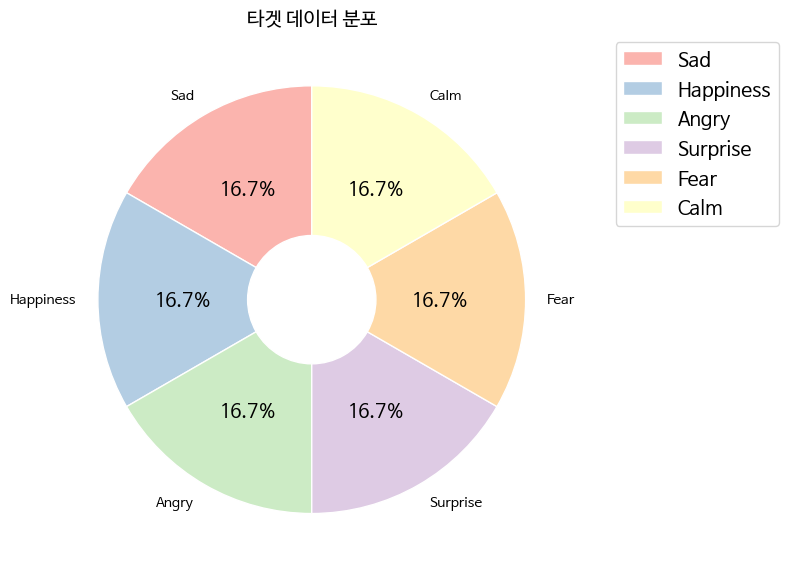

In [47]:
# 타겟 데이터 분포 확인

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

counts = label_counts['count']
labels = label_counts['emotion']

# 그래프 크기 설정
plt.figure(figsize=(20, 6))

# 그래프 그리기
plt.pie(counts, labels=labels, colors=outer_colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
plt.title('타겟 데이터 분포')

# 범례를 그래프 오른쪽에 배치
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## 2. 음성 데이터 분석

In [48]:
import librosa
import librosa.display

In [49]:
# # 발화 시간을 저장할 리스트
# durations = []

# for index, row in labeling_df.iterrows():
#     y, sr = librosa.load(row['file_path'])
#     duration = librosa.get_duration(y=y, sr=sr)
#     durations.append(duration)

# # 발화 시간 분포 시각화
# plt.figure(figsize=(10, 6))

# plt.hist(durations, colors=outer_colors[0], bins=30, edgecolor='black')
# plt.title("Distribution of Speech Durations")
# plt.xlabel("Duration (seconds)")
# plt.ylabel("Frequency")
# plt.show()

In [50]:
# for index, row in random_sad.iterrows():
#     # file_path에 해당하는 blob 객체 생성
#     blob = bucket.blob(row['file_path'])

#     # 음성 파일 메모리에 로드
#     data = blob.download_as_bytes()

#     # 메모리에서 직접 로드하여 librosa로 처리
#     with BytesIO(data) as audio_file:
#         y, sr = librosa.load(audio_file)


#     # 파형 그래프 그리기
#     plt.figure(figsize=(10, 4))
#     librosa.display.waveshow(y, sr=sr)
#     plt.title(f"{row['file_path']}")
#     plt.show()

In [51]:
# import librosa
# import matplotlib.pyplot as plt

# # 마운트된 GCS 파일 경로를 바로 사용
# file_path = '/mnt/gcs-bucket/data/F2001/F2001_000001.wav'
# y, sr = librosa.load(file_path)

# # 파형 그래프 그리기
# plt.figure(figsize=(10, 4))
# librosa.display.waveshow(y, sr=sr)
# plt.title("Waveform")
# plt.show()

# 모델 훈련

## 1. 모델과 프로세서 불러오기
https://huggingface.co/docs/transformers/model_doc/wav2vec2

In [52]:
# !pip install transformers datasets soundfile

#### ○ 트러블 슈팅
- 입력 코드  
```
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Trainer, TrainingArguments
```

<br>

- 오류 코드  
```
RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.
```

<br>

버전 호환 문제 발생으로 `pip install tf-keras` 추가 설치

In [53]:
# !pip install tf-keras

In [54]:
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor, Trainer, TrainingArguments

In [55]:
# 사용할 모델 이름 설정
# Hugging Face에서 제공하는 사전 학습된 wac2vec2 모델 사용
model_name = "facebook/wav2vec2-base-960h"

# Wav2Vec2Processor 로드
# 모델 입력 데이터에 맞게 음성 데이터 전리리
processor = Wav2Vec2Processor.from_pretrained(model_name)

# Wav2Vec2ForCTC 모델 로드
# 음성 인식용 사전 학습 모델 가져기기
model = Wav2Vec2ForCTC.from_pretrained(model_name)

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## 2. 데이터 분리

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
labeling_df

,folder_name,file_name,file_path,gender,emotion
0,F2001,F2001_000001.wav,/mnt/gcs-bucket/...,F,Sad
1,F2001,F2001_000002.wav,/mnt/gcs-bucket/...,F,Sad
2,F2001,F2001_000003.wav,/mnt/gcs-bucket/...,F,Sad
3,F2001,F2001_000004.wav,/mnt/gcs-bucket/...,F,Sad
4,F2001,F2001_000005.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
79995,M6003,M6003_000156.wav,/mnt/gcs-bucket/...,M,Calm
79996,M6003,M6003_000157.wav,/mnt/gcs-bucket/...,M,Calm
79997,M6003,M6003_000158.wav,/mnt/gcs-bucket/...,M,Calm
79998,M6003,M6003_000159.wav,/mnt/gcs-bucket/...,M,Calm


In [58]:
# 훈련/테스트 데이터 분리
train_co_df, test_df = \
train_test_split(labeling_df, test_size=0.2, stratify=labeling_df['emotion'], random_state=42)

# 훈련/검증 데이터 분리
train_df, val_df = \
train_test_split(train_co_df, test_size=0.2, stratify=train_co_df['emotion'], random_state=42)

# stratify=labeling_df['emotion'] : emotion 기준으로 각 데이터 셋에 고르게 분포

In [59]:
train_df

,folder_name,file_name,file_path,gender,emotion
49756,M2062,M2062_000157.wav,/mnt/gcs-bucket/...,M,Calm
24027,F4012,F4012_000028.wav,/mnt/gcs-bucket/...,F,Sad
27733,F4035,F4035_000054.wav,/mnt/gcs-bucket/...,F,Angry
37015,F5041,F5041_000056.wav,/mnt/gcs-bucket/...,F,Angry
55454,M3036,M3036_000095.wav,/mnt/gcs-bucket/...,M,Fear
...,...,...,...,...,...
21133,F3060,F3060_000014.wav,/mnt/gcs-bucket/...,F,Happiness
36036,F5035,F5035_000037.wav,/mnt/gcs-bucket/...,F,Happiness
53030,M3021,M3021_000071.wav,/mnt/gcs-bucket/...,M,Surprise
4188,F2027,F2027_000029.wav,/mnt/gcs-bucket/...,F,Sad


In [60]:
val_df

,folder_name,file_name,file_path,gender,emotion
29517,F4046,F4046_000078.wav,/mnt/gcs-bucket/...,F,Surprise
72323,M5013,M5013_000004.wav,/mnt/gcs-bucket/...,M,Sad
5059,F2032,F2032_000100.wav,/mnt/gcs-bucket/...,F,Fear
66680,M4036,M4036_000121.wav,/mnt/gcs-bucket/...,M,Surprise
27366,F4033,F4033_000007.wav,/mnt/gcs-bucket/...,F,Sad
...,...,...,...,...,...
36925,F5040,F5040_000126.wav,/mnt/gcs-bucket/...,F,Surprise
71564,M5008,M5008_000045.wav,/mnt/gcs-bucket/...,M,Angry
13773,F3014,F3014_000014.wav,/mnt/gcs-bucket/...,F,Happiness
5214,F2033,F2033_000095.wav,/mnt/gcs-bucket/...,F,Fear


In [61]:
test_df

,folder_name,file_name,file_path,gender,emotion
52656,M3019,M3019_000017.wav,/mnt/gcs-bucket/...,M,Happiness
75088,M5030,M5030_000049.wav,/mnt/gcs-bucket/...,M,Angry
49354,M2060,M2060_000075.wav,/mnt/gcs-bucket/...,M,Surprise
57307,M3048,M3048_000028.wav,/mnt/gcs-bucket/...,M,Sad
16717,F3032,F3032_000078.wav,/mnt/gcs-bucket/...,F,Surprise
...,...,...,...,...,...
60002,M3065,M3065_000003.wav,/mnt/gcs-bucket/...,M,Sad
40715,M2006,M2006_000076.wav,/mnt/gcs-bucket/...,M,Surprise
5435,F2034,F2034_000156.wav,/mnt/gcs-bucket/...,F,Calm
77633,M5046,M5046_000034.wav,/mnt/gcs-bucket/...,M,Happiness


## 3. 전처리 함수 정의

In [62]:
import soundfile as sf

In [63]:
# def preprocess_data(batch):
#     # 음성 파일 읽기
#     # batch(받아 올 데이터셋의 각 행)에 있는 file_path를 읽기
#     # 'speech_array'에 오디오 데이터(음성 데이터를 샘플 단위로 저장),
#     # 'sampling_rate'에 샘플링 레이트(초당 샘플 개수)를 저장
#     speech_array, sampling_rate = sf.read(batch['file_path'])
    
#     # processor로 입력 값 처리
#     inputs = processor(speech_array, sampling_rate=sampling_rate, return_tensors='pt', padding=True)

#     # 타겟 레이블 변환 (emotion)
#     batch["input_values"] = inputs.input_values[0]
#     batch["attention_mask"] = inputs.attention_mask[0]
#     batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def preprocess_data(batch):
    # 음성 파일 읽기
    speech_array, sampling_rate = sf.read(batch['file_path'])
    # processor로 입력 값 처리
    inputs = processor(speech_array, sampling_rate=sampling_rate, return_tensors='pt', padding=True)

    # 타겟 레이블 변환 (emotion)
    batch["input_values"] = inputs.input_values[0]
    batch["attention_mask"] = inputs.attention_mask[0]
    batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
    return batch
```

```
train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)
```

<br>

- 오류 코드
```
ValueError: The model corresponding to this feature extractor: Wav2Vec2FeatureExtractor {
  "do_normalize": true,
  "feature_extractor_type": "Wav2Vec2FeatureExtractor",
  "feature_size": 1,
  "padding_side": "right",
  "padding_value": 0.0,
  "return_attention_mask": false,
  "sampling_rate": 16000
}
 was trained using a sampling rate of 16000. Please make sure that the provided `raw_speech` input was sampled with 16000 and not 44100.
```

<br>

Wav2Vec2 모델이 16,000Hz로 샘플링된 오디오 데이터 사용  
현재 오디오 파일 샘플링 레이트가 44,100Hz로 추정되며, librosa를 사용해 16,000Hz로 변환 필요

In [64]:
# !pip install librosa

In [65]:
import librosa

In [66]:
# def preprocess_data(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     speech_array, sampling_rate = librosa.load(batch["file_path"], sr=16000)
    
#     # processor로 입력값 처리
#     inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
#     # 타겟 레이블 변환 (emotion)
#     batch["input_values"] = inputs.input_values[0]
#     batch["attention_mask"] = inputs.attention_mask[0]
#     batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def preprocess_data(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    speech_array, sampling_rate = librosa.load(batch["file_path"], sr=16000)
    
    # processor로 입력값 처리
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
    # 타겟 레이블 변환 (emotion)
    batch["input_values"] = inputs.input_values[0]
    batch["attention_mask"] = inputs.attention_mask[0]
    batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
    return batch
```

```
train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)
```

<br>

- 오류 코드
```
KeyError: 'attention_mask'

During handling of the above exception, another exception occurred:
```

<br>

Wav2Vec2Processor의 일부 모델 설정에서 attention_mask가 기본적으로 포함되지 않기 때문에 발생  
attention_mask가 없는 경우, 조건으로 확인하여 오류 피하기

In [67]:
# def preprocess_data(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
#     # processor로 입력값 처리
#     # 모델이 사용 가능한 형식으로 오디오 데이터 변환
#     inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
#     # input_values 추가
#     batch["input_values"] = inputs.input_values[0]
    
#     # attention_mask가 있을 경우 추가
#     if "attention_mask" in inputs:
#         batch["attention_mask"] = inputs.attention_mask[0]
    
#     # 타겟 레이블 변환 (emotion)
#     batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def preprocess_data(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
    # processor로 입력값 처리
    # 모델이 사용 가능한 형식으로 오디오 데이터 변환
    inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)
    
    # input_values 추가
    batch["input_values"] = inputs.input_values[0]
    
    # attention_mask가 있을 경우 추가
    if "attention_mask" in inputs:
        batch["attention_mask"] = inputs.attention_mask[0]
    
    # 타겟 레이블 변환 (emotion)
    batch["labels"] = processor(text=batch["emotion"], return_tensors="pt").input_ids[0]
    
    return batch
```

```
train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)
```

<br>

- 오류
  
<img src='https://github.com/user-attachments/assets/1467393c-da5d-4a35-b265-cadb569a433d' width='800'>

<br>

커널 다운 현상 발생 메모리 부족으로 판단됨,  
batched=True 옵션을 사용하거나 로드 단계와 데이터 변환 단계를 분리하여 진행

In [68]:
# def load_audio(batch):
#     # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
#     speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
#     # speech_array를 batch에 추가
#     batch["speech_array"] = speech_array
    
#     return batch

#### ○ 트러블 슈팅
- 입력 코드
```
def load_audio(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    speech_array, _ = librosa.load(batch["file_path"], sr=16000)
    
    # speech_array를 batch에 추가
    batch["speech_array"] = speech_array
    
    return batch
```
```
# 데이터 프레임을 Hugging Face 데이터셋 형식으로 변환
# .map(preprocess_data) : 데이터셋의 각 데이터 행에 대해 preprocess_data 함수 호출하여 데이터 전처리
train_dataset = Dataset.from_pandas(train_df).map(load_audio, batched=True, batch_size=8)
val_dataset = Dataset.from_pandas(val_df).map(load_audio, batched=True, batch_size=8)
test_dataset = Dataset.from_pandas(test_df).map(load_audio, batched=True, batch_size=8)
```

<br>

- 오류
```
TypeError: Invalid file: ['/mnt/gcs-bucket/data/F2011/F2011_000129.wav', '/mnt/gcs-bucket/data/F3014/F3014_000035.wav', '/mnt/gcs-bucket/data/M3055/M3055_000099.wav', '/mnt/gcs-bucket/data/M3005/M3005_000151.wav', '/mnt/gcs-bucket/data/M2003/M2003_000058.wav', '/mnt/gcs-bucket/data/F4003/F4003_000101.wav', '/mnt/gcs-bucket/data/M3015/M3015_000104.wav', '/mnt/gcs-bucket/data/M2012/M2012_000127.wav']
```

<br>

`batched=True` 옵션을 추가하면서 문제 발생.  
`batched=True` 사용 시 배치가 리스트 형태로 전달되어, file_path가 단일 값이 아닌 리스트로 넘어옴.  
개별 처리가 가능하도록 개선.  

librosa.load(file_path, sr=16000)는 두 개의 값을 반환하는데,  
for 반복 문에서 리스트 형태로 받을 때,  
반환 요소가 튜플로 처리 되므로 튜플 언패킹을 추가로 설정이 필요함.

In [69]:
def load_audio(batch):
    # 파일 경로에서 오디오 데이터를 16,000Hz로 로드
    loaded_audio  = [librosa.load(file_path, sr=16000) for file_path in batch["file_path"]]
            
    # 튜플 리스트에서 speech_array만 추출하여 batch에 추가
    batch["speech_array"] = [audio[0] for audio in loaded_audio]
    
    return batch

In [70]:
def preprocess_data(batch):
    # load_audio에서 추가한 speech_array를 사용
    inputs = processor(
        batch["speech_array"], 
        sampling_rate=16000, 
        return_tensors="pt", 
        padding="longest",  # 가장 긴 샘플에 맞춰 패딩
        truncation=True,  # 트렁케이션 설정
        max_length=16000  # 적절한 max_length 설정
    )
    
    batch["input_values"] = inputs.input_values
    
    if "attention_mask" in inputs:
        batch["attention_mask"] = inputs.attention_mask
        
    batch["labels"] = processor(
        text=batch["emotion"], 
        return_tensors="pt", 
        padding=True, 
        truncation=True, 
        max_length=128  # 텍스트 입력에 대한 max_length 설정
    ).input_ids
    
    # 메모리 절약을 위해 speech_array 제거
    del batch["speech_array"]
    
    return batch


#### ○ code review
1. load_audio

1.1. 변경 전
```
speech_array, sampling_rate = sf.read(batch['file_path'])
```

- `soundfile.read`를 사용했지만, Wav2Vec2 모델이 16,000Hz로 샘플링 데이터를 요구
- 샘플링 레이트 변환이 필요하여 `librosa.load` 사용

<br>

1.2. 변경 후  
```
speech_array, sampling_rate = librosa.load(batch["file_path"], sr=16000)
```

- sr=16000 : 오디오 데이터를 16,000Hz로 리샘플링 (모델이 요구하는 샘플링 레이트)
- speech_array: 샘플링된 오디오 데이터가 배열 형식으로 저장
- ampling_rate: 샘플링된 레이트 값(16,000Hz)을 반환

<br></br>

2. preprocess_data
```
inputs = processor(batch["speech_array"], sampling_rate=16000, return_tensors="pt", padding=True)
```

- processor로 입력값 처리
- 모델이 사용 가능한 형식으로 오디오 데이터 변환
- return_tensors='pt': 변환된 데이터를 PyTorch 텐서 형식으로 반환
- padding=True: 입력 데이터의 길이를 맞추기 위해 패딩을 추가

<br>



## 4. 데이터셋 전처리 및 생성

In [71]:
from datasets import Dataset

In [72]:
# # 데이터 프레임을 Hugging Face 데이터셋 형식으로 변환
# # .map(preprocess_data) : 데이터셋의 각 데이터 행에 대해 preprocess_data 함수 호출하여 데이터 전처리
# train_dataset = Dataset.from_pandas(train_df).map(preprocess_data)
# val_dataset = Dataset.from_pandas(val_df).map(preprocess_data)
# test_dataset = Dataset.from_pandas(test_df).map(preprocess_data)

In [73]:
# # 데이터 프레임을 Hugging Face 데이터셋 형식으로 변환
# # .map(preprocess_data) : 데이터셋의 각 데이터 행에 대해 preprocess_data 함수 호출하여 데이터 전처리
# train_dataset = Dataset.from_pandas(train_df).map(load_audio, batched=True, batch_size=8)
# val_dataset = Dataset.from_pandas(val_df).map(load_audio, batched=True, batch_size=8)
# test_dataset = Dataset.from_pandas(test_df).map(load_audio, batched=True, batch_size=8)

In [74]:
# train_dataset = train_dataset.map(preprocess_data, batched=True, batch_size=8)
# val_dataset = val_dataset.map(preprocess_data, batched=True, batch_size=8)
# test_dataset = test_dataset.map(preprocess_data, batched=True, batch_size=8)

In [78]:
import gc
from datasets import Dataset

def preprocess(df, name):
    # 데이터 세트를 10개로 나누기
    data_splits = np.array_split(df, 10)

    for i, split_df in enumerate(data_splits):
        # 각 분할을 Dataset 형식으로 변환
        split_dataset = Dataset.from_pandas(split_df)

        # 오디오 로드와 전처리 수행
        split_dataset = split_dataset.map(load_audio, batched=True, batch_size=8)
        split_dataset = split_dataset.map(preprocess_data, batched=True, batch_size=8)

        # 처리된 데이터셋을 디스크에 저장
        split_dataset.save_to_disk(f"./data/datasets/{name}/processed_split_{i}.dataset")

        # 메모리 해제
        del split_df, split_dataset  # 사용하지 않는 변수 삭제
        gc.collect()  # 메모리 해제

---------------------------------------------------------------------------
PermissionError                           Traceback (most recent call last)
Cell In[77], line 1
----> 1 preprocess(train_df, 'train')

Cell In[76], line 17, in preprocess(df, name)
     14 split_dataset = split_dataset.map(preprocess_data, batched=True, batch_size=8)
     16 # 처리된 데이터셋을 디스크에 저장
---> 17 split_dataset.save_to_disk(f"/mnt/gcs-bucket/song/{name}/processed_split_{i}.dataset")
     19 # 메모리 해제
     20 del split_df, split_dataset  # 사용하지 않는 변수 삭제

File ~/workspace/venv/lib/python3.10/site-packages/datasets/arrow_dataset.py:1482, in Dataset.save_to_disk(self, dataset_path, max_shard_size, num_shards, num_proc, storage_options)
   1477     if Path(dataset_path).expanduser().resolve() in parent_cache_files_paths:
   1478         raise PermissionError(
   1479             f"Tried to overwrite {Path(dataset_path).expanduser().resolve()} but a dataset can't overwrite itself."
   1480         )
-> 1482 fs.makedirs(dataset_path, exist_ok=True)
   1484 # Get json serializable state
   1485 state = {
   1486     key: self.__dict__[key]
   1487     for key in [
   (...)
   1493     ]
   1494 }

File ~/workspace/venv/lib/python3.10/site-packages/fsspec/implementations/local.py:52, in LocalFileSystem.makedirs(self, path, exist_ok)
     50 def makedirs(self, path, exist_ok=False):
     51     path = self._strip_protocol(path)
---> 52     os.makedirs(path, exist_ok=exist_ok)

File /usr/lib/python3.10/os.py:225, in makedirs(name, mode, exist_ok)
    223         return
    224 try:
--> 225     mkdir(name, mode)
    226 except OSError:
    227     # Cannot rely on checking for EEXIST, since the operating system
    228     # could give priority to other errors like EACCES or EROFS
    229     if not exist_ok or not path.isdir(name):

PermissionError: [Errno 13] Permission denied: '/mnt/gcs-bucket/song/train/processed_split_0.dataset'

In [80]:
preprocess(train_df, 'train')

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Map:   0%|          | 0/3840 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/3840 [00:00<?, ? examples/s]

In [79]:
preprocess(val_df, 'val')

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/960 [00:00<?, ? examples/s]

In [81]:
preprocess(test_df, 'test')

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1200 [00:00<?, ? examples/s]

In [82]:
from datasets import load_from_disk
import gc

def load_disk(name):
    # 빈 리스트에 모든 분할 데이터를 저장
    all_processed_splits = []
    
    # 각 조각을 디스크에서 불러와 리스트에 추가
    for i in range(10):
        split_dataset = load_from_disk(f"./data/datasets/{name}/processed_split_{i}.dataset")
        all_processed_splits.append(split_dataset)

        # 메모리 해제
        gc.collect()
    
    return all_processed_splits

In [83]:
train_processed_splits = load_disk('train')

In [85]:
val_processed_splits = load_disk('val')

In [86]:
test_processed_splits = load_disk('test')

In [88]:
from datasets import concatenate_datasets

In [89]:
# 병합
train_dataset = concatenate_datasets(train_processed_splits)
val_dataset = concatenate_datasets(val_processed_splits)
test_dataset = concatenate_datasets(test_processed_splits)

## 5. 평가지표 정의

In [ ]:
# !pip install evaluate

In [ ]:
from evaluate import load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [ ]:
# WER 메트릭 로드
wer_metric = load("wer")

In [ ]:
# 평가 지표를 계산하는 함수 정의
def compute_metrics(pred):
    pred_ids = pred.predictions.argmax(-1)
    pred_str = processor.batch_decode(pred_ids)
    label_ids = pred.label_ids
    label_str = processor.batch_decode(label_ids, group_tokens=False)
    
    # WER
    wer = wer_metric.compute(predictions=pred_str, references=label_str)
    
    # 정확도, 정밀도, 재현율, F1 점수
    accuracy = accuracy_score(label_ids, pred_ids)
    precision = precision_score(label_ids, pred_ids, average='weighted')
    recall = recall_score(label_ids, pred_ids, average='weighted')
    f1 = f1_score(label_ids, pred_ids, average='weighted')
    
    # 혼동 행렬
    cm = confusion_matrix(label_ids, pred_ids)
    
    # ROC 커브 (여러 클래스일 경우 각 클래스별로 확인 가능)
    fpr, tpr, _ = roc_curve(label_ids.ravel(), pred_ids.ravel(), pos_label=1)
    roc_auc = auc(fpr, tpr)
    
    # ROC 커브 시각화
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:0.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    # 결과 반환
    return {
        "wer": wer,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm,
        "roc_auc": roc_auc
    }

## 6. 학습 파라미터 정의

In [ ]:
training_args = TrainingArguments(
    output_dir="./wav2vec2-finetuned",
    group_by_length=True,
    per_device_train_batch_size=8,
    evaluation_strategy="epoch",
    num_train_epochs=3,
    save_steps=500,
    eval_steps=500,
    logging_steps=500,
    learning_rate=1e-4,
    warmup_steps=500,
    save_total_limit=2,
)

## 7. Trainer 초기화

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=processor.feature_extractor,
    compute_metrics=compute_metrics,
)

## 8. 학습

In [ ]:
trainer.train()